Importing modules

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stablishing routes, you need to copy and paste your path

In [182]:
df_games = pd.read_csv(r"F:\Documentos\eli\0ELI\estudios\Coding\GitHub\project - final\CFG_Degree_Project_Group_4\data\cleaned\cleaned_games.csv")

In [183]:
df_char = pd.read_csv(r"F:\Documentos\eli\0ELI\estudios\Coding\GitHub\project - final\CFG_Degree_Project_Group_4\data\cleaned\cleaned_characters.csv")

#df_char.info()

In [184]:
df_sex = pd.read_csv(r"F:\Documentos\eli\0ELI\estudios\Coding\GitHub\project - final\CFG_Degree_Project_Group_4\data\cleaned\cleaned_sexualization.csv")
#df_sex.info()

Removing duplicates

In [185]:

df_char_cleaned = df_char.drop_duplicates()
df_sex_cleaned = df_sex.drop_duplicates()
df_games_cleaned = df_games.drop_duplicates()

#### Variables that we are going to use, they are along the code:

In [186]:
# df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game']]
# df_sex.rename(columns={'character_id': 'Id'}, inplace=True) #renaming columns so joins are easiest
# df_merged = pd.merge(df_char, df_sex, on ='Id')

First stats

In [187]:
#df_sex.describe()

In [188]:
#df_char.describe()

More examples

In [189]:
#df_char.head(10)

I don't agree with zelda as no trophy, also she's kidnapped

In [190]:
#df_sex.head(10)

In [191]:
df_char.value_counts("Gender")

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

Checking from what games comes non-binary

In [192]:
df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game']]
#print(df_non_b)

# CHARACTER DATA QUESTIONS (this part is on simone branch, this is me testing)

Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?
Joining gender-sex_cloths and then doing a sum 

In [193]:
# I need to change column names to Id
df_sex.rename(columns={'character_id': 'Id'}, inplace=True)

In [194]:
df_sex

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0
...,...,...,...,...,...,...
632,KBOS_Beni,0,0,0,0,0
633,KBOS_Taro,0,0,0,0,0
634,KBOS_Rusu,0,0,0,0,0
635,KBOS_Adira,0,0,0,0,0


In [195]:
df_sex.columns

Index(['Id', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

# Creating df_merged variable through join 

In [196]:
#CREATING DF_MERGED VARIABLE
df_merged = pd.merge(df_char, df_sex, on ='Id')
#df_merged

#### Can't join with df_games !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [235]:
#merging with db_game
#df_merged_g = pd.merge(df_merged, df_games, left_on='Game', right_on='Title')
#empty data cos there is no PK in common

In [198]:

# sum sexualized_clothing by gender
clothing_sexualization_by_gender = df_merged.groupby('Gender')['Sexualized_clothing'].sum()
clothing_sexualization_by_gender

Gender
Custom         0
Female        17
Male           2
Non-binary     0
Name: Sexualized_clothing, dtype: int64

### 1C. What are the trends, if any, when gender percentage is split by age range?

In [199]:

#gender  % by age range
gender_age_distribution = df_char.groupby(['Age_range', 'Gender']).size().unstack().fillna(0)
gender_age_distribution_percentage = gender_age_distribution.div(gender_age_distribution.sum(axis=1), axis=0) * 100




Visual % - age

<Figure size 1000x1000 with 0 Axes>

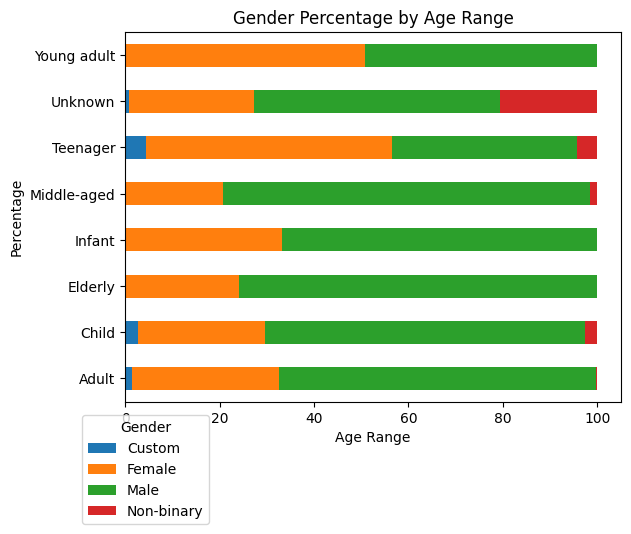

In [200]:
# Visualization of gender percentage by age range with the legend further down to make 'Adult' readable
plt.figure(figsize=(10, 10))
gender_age_distribution_percentage.plot(kind='barh', stacked=True)
plt.title('Gender Percentage by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.1, -0.35))
plt.show()


On women, number of chars: Teenager > young adult > infant

### 2C. Playable character probability by gender

In [201]:
playable_gender_distribution = df_char.groupby(['Gender', 'Playable']).size().unstack().fillna(0)
playable_gender_percentage = playable_gender_distribution.div(playable_gender_distribution.sum(axis=1), axis=0) * 100

<Figure size 1000x600 with 0 Axes>

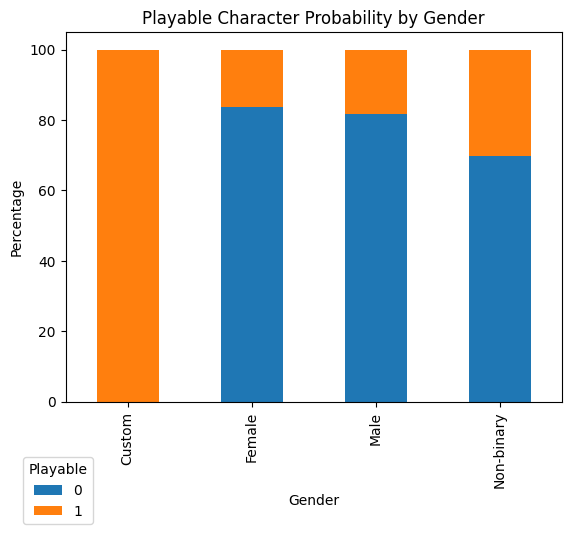

In [202]:
#visualization
plt.figure(figsize=(10, 6))
playable_gender_percentage.plot(kind='bar', stacked=True)
plt.title('Playable Character Probability by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Playable', loc='lower left', bbox_to_anchor=(-0.1, -0.35))
plt.show()

### 3C. General pattern in sexualization by gender

In [203]:
gender_sexualization = df_char.groupby('Gender')['Sexualization_total'].mean()

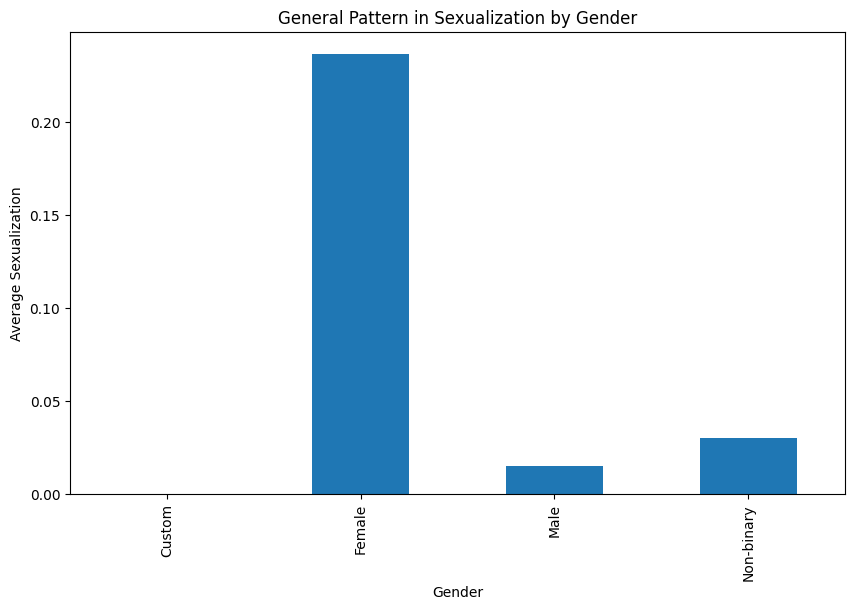

In [204]:
plt.figure(figsize=(10, 6))
gender_sexualization.plot(kind='bar')
plt.title('General Pattern in Sexualization by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sexualization')
plt.show()

(:

# SEXUALIZATION DATA QUESTIONS.

In [205]:
df_char.columns
df_sex.columns

Index(['Id', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

### 1Q.S. Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?

In [206]:
gender_sexualized_clothing = df_merged.groupby('Gender')['Sexualized_clothing'].mean()
# gender_sexualized_clothing

#### visualization of gender most likely to wear sexualized clothing:

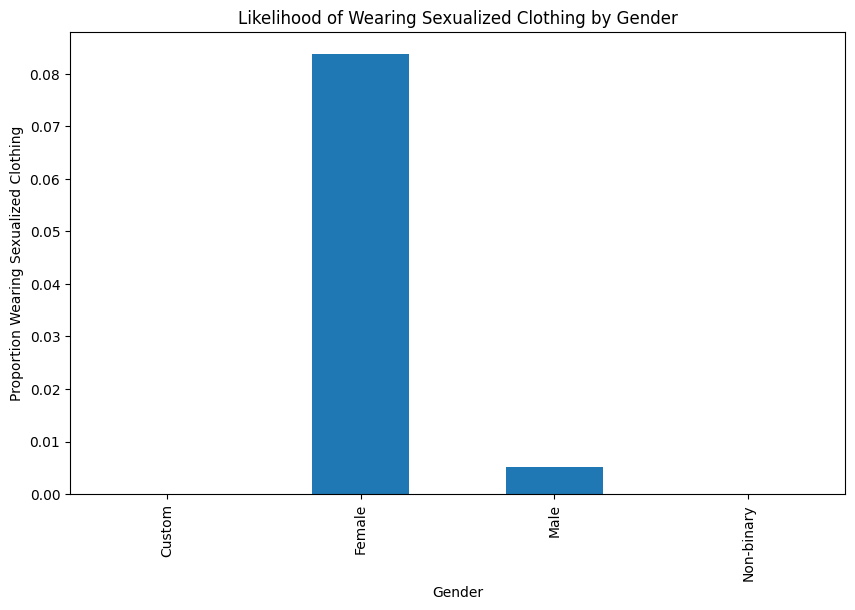

In [207]:
plt.figure(figsize=(10, 6))
gender_sexualized_clothing.plot(kind='bar')
plt.title('Likelihood of Wearing Sexualized Clothing by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion Wearing Sexualized Clothing')
plt.show()

### 2Q.S. From what games comes non_binary characters ? Merging with countries that have more non-binary countries.


In [208]:
#New variable df : non_binary_games
non_binary_games = df_merged[df_merged['Gender'] == 'Non-binary']['Game'].value_counts()

#### visualization non_binary_games

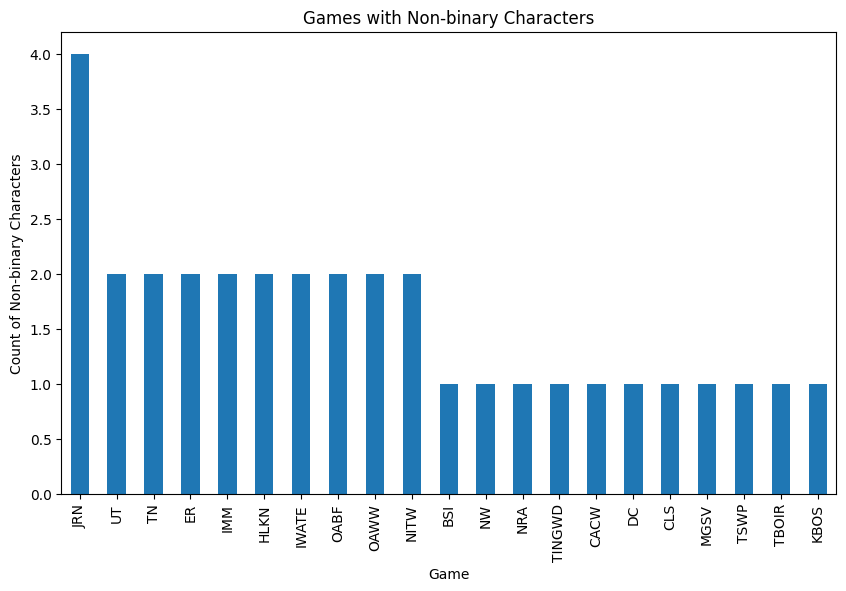

In [209]:
plt.figure(figsize=(10, 6))
non_binary_games.plot(kind='bar')
plt.title('Games with Non-binary Characters')
plt.xlabel('Game')
plt.ylabel('Count of Non-binary Characters')
plt.show()

### 3Q.S. Through the years which year had the most sexualized clothing?

Here we need to refeer to game db, so:

In [210]:
#df_merged

In [211]:
#df_merged_g.columns

In [212]:
year_sexualized_clothing = df_merged_g.groupby('Release')['Sexualized_clothing'].sum()
#year_sexualized_clothing

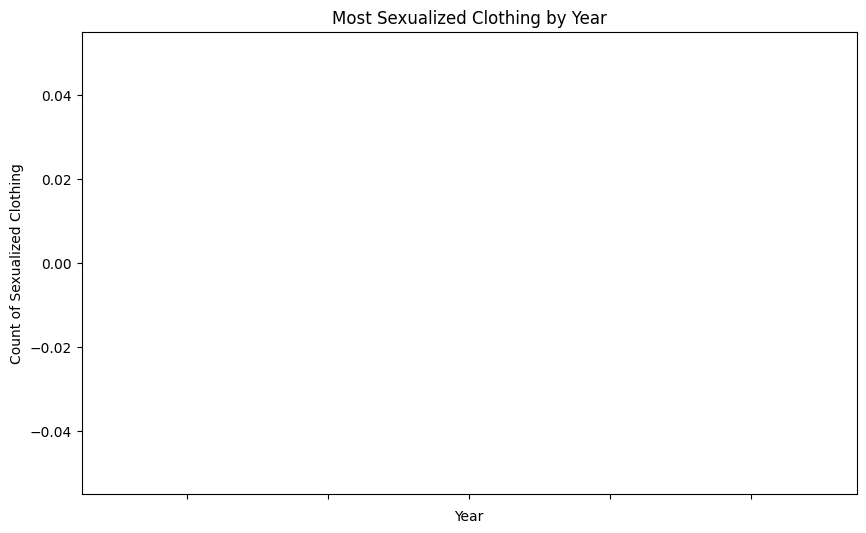

In [213]:

plt.figure(figsize=(10, 6))
year_sexualized_clothing.plot(kind='line', marker='o')
plt.title('Most Sexualized Clothing by Year')
plt.xlabel('Year')
plt.ylabel('Count of Sexualized Clothing')
plt.show()


Empty data becouse there is not a well defined PK in tables

2015 and 2019 are the TOP ones

### 4Q_S. Who are the characters who have more sexualized clothes?

In [214]:
# grouping by: name, function, and gender, then sum the amount of sexualized clothing
characters_sexualized_clothing_all_with_gender = df_merged.groupby(['Name', 'Function', 'Gender'])['Sexualized_clothing'].sum()

In [215]:
# Creating a new df from the sorted series for easier plotting
df_top_characters = characters_sexualized_clothing_all_with_gender.reset_index()

In [232]:
df_char.columns

Index(['Name', 'Gender', 'Game', 'Age_range', 'Playable',
       'Sexualization_total', 'Id', 'Species', 'Alliance', 'Function',
       'Romantic_Interest'],
      dtype='object')

In [237]:
# Group the data by character name, function, and gender, then sum the amount of sexualized clothing
characters_sexualized_clothing_all_with_gender = df_merged.groupby(['Name', 'Function', 'Gender'])['Sexualized_clothing'].sum()

# Sort the results in descending order to identify characters with the most sexualized clothing
characters_sexualized_clothing_sorted_all_with_gender = characters_sexualized_clothing_all_with_gender.sort_values(ascending=False).head(10)

# Crear un DataFrame a partir de la serie ordenada
df_top_characters = characters_sexualized_clothing_sorted_all_with_gender.reset_index()
# Combinando 'Name', 'Function', y 'Gender' en una sola columna para mejor legibilidad en el gráfico
df_top_characters['Character_Info'] = df_top_characters['Name'] + ' (' + df_top_characters['Function'] + ', ' + df_top_characters['Gender'] + ')'












Primeras filas de df_top_characters después de añadir 'Character_Info':
             Name Function  Gender  Sexualized_clothing  \
0       Bayonetta       PA  Female                    1   
1          Amanda       SC  Female                    1   
2    Ann Takamaki       DA  Female                    1   
3            Ciri       DA  Female                    1   
4  Citra Taulgami       MC  Female                    1   

                Character_Info  
0       Bayonetta (PA, Female)  
1          Amanda (SC, Female)  
2    Ann Takamaki (DA, Female)  
3            Ciri (DA, Female)  
4  Citra Taulgami (MC, Female)  


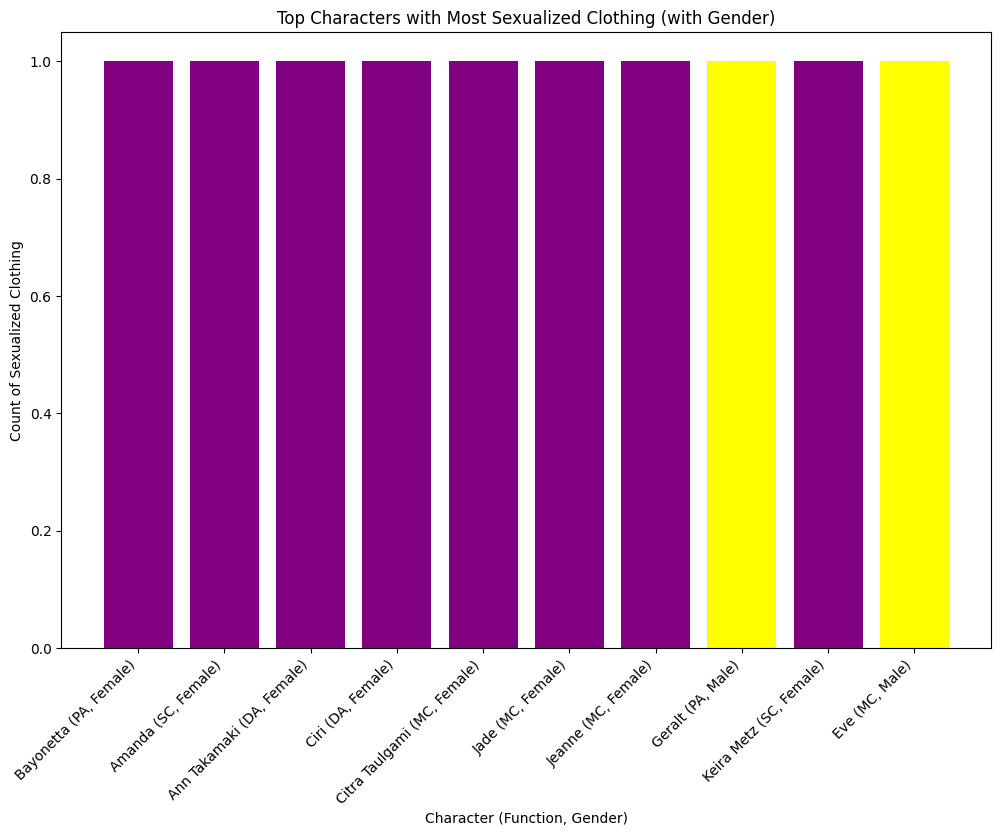

In [242]:
# Assign colors based on gender
colors = df_top_characters['Gender'].apply(lambda x: 'yellow' if x == 'Male' else 'purple')
# Visualization
plt.figure(figsize=(12, 8))
plt.bar(df_top_characters['Character_Info'], df_top_characters['Sexualized_clothing'], color=colors)
plt.title('Top Characters with Most Sexualized Clothing (with Gender)')
plt.xlabel('Character (Function, Gender)')
plt.ylabel('Count of Sexualized Clothing')
plt.xticks(rotation=45, ha='right')
plt.show()


### 5Q_SWhat age range are most likely to have romantic_interest?



In [ ]:
#grouping by romantic_interest + age_range
age_romantic_interest = df_merged[df_merged['Romantic_Interest'] == 1].groupby('Age_range').size()

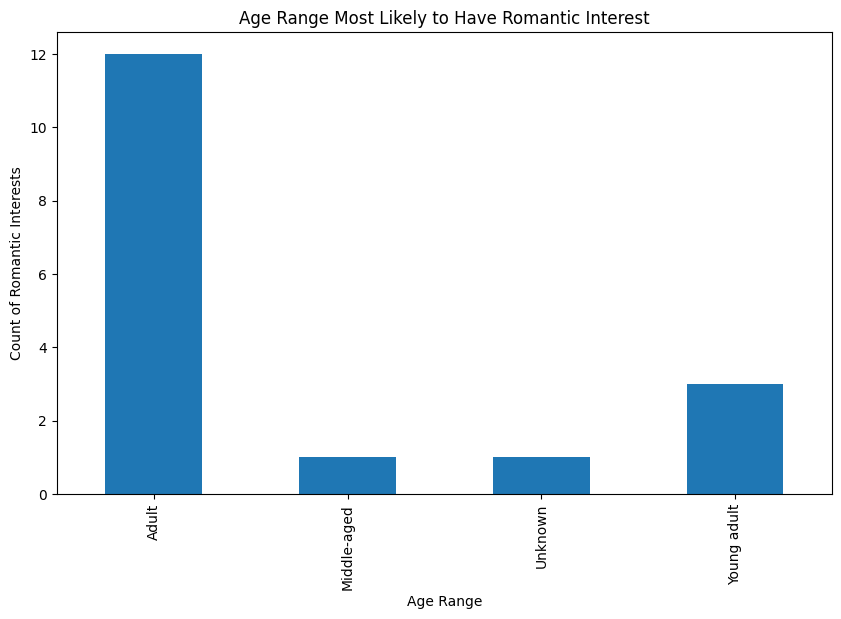

Age_range
Adult          12
Middle-aged     1
Unknown         1
Young adult     3
dtype: int64


In [ ]:
# visuals
plt.figure(figsize=(10, 6))
age_romantic_interest.plot(kind='bar')
plt.title('Age Range Most Likely to Have Romantic Interest')
plt.xlabel('Age Range')
plt.ylabel('Count of Romantic Interests')
plt.show()

# results
print(age_romantic_interest)

Adults chars are more likely to have romantic interest, then young adults and finaly middle-age

##### Are they also getting sexualized clothes?

In [ ]:
# merging and filter on Romantic_Interest == 1 
romantic_characters = df_merged[df_merged['Romantic_Interest'] == 1]

# group by age + sexualized_clothing
age_sexualized_clothing = romantic_characters.groupby('Age_range')['Sexualized_clothing'].sum()
age_sexualized_clothing


Age_range
Adult          3
Middle-aged    1
Unknown        0
Young adult    0
Name: Sexualized_clothing, dtype: int64

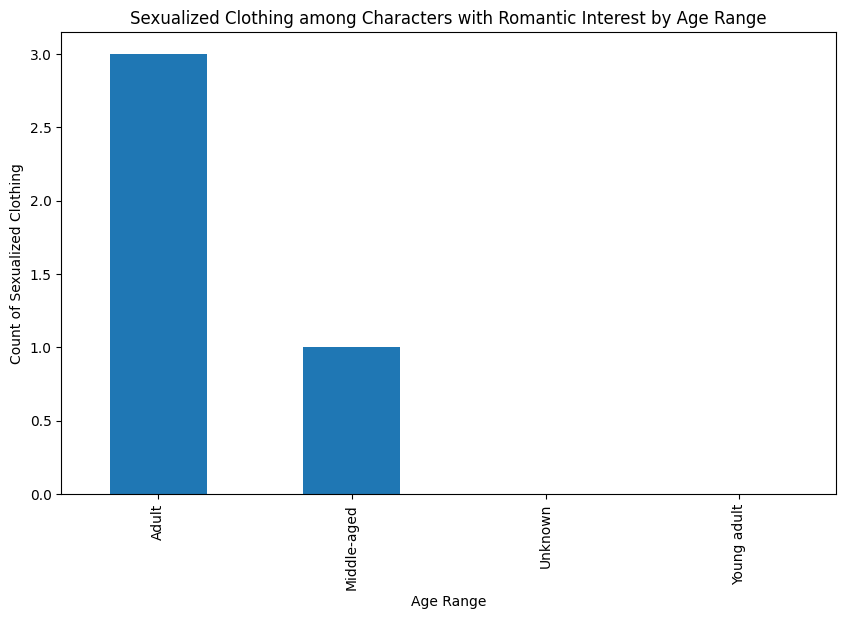

In [ ]:
# Visuals
plt.figure(figsize=(10, 6))
age_sexualized_clothing.plot(kind='bar')
plt.title('Sexualized Clothing among Characters with Romantic Interest by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count of Sexualized Clothing')
plt.show()


##### What game has the most character with as romantic interest and age of the characters?

In [ ]:
# grouping by game and chars with romantic interest
game_romantic_interest = romantic_characters.groupby('Game').size().sort_values(ascending=False)
game_romantic_interest

Game
FC3       2
ITT       2
TLOU2     2
ER        1
GTAV      1
FLR       1
HLM       1
NW        1
SK        1
PP        1
SMO       1
TINGWD    1
TW3       1
UC4       1
dtype: int64

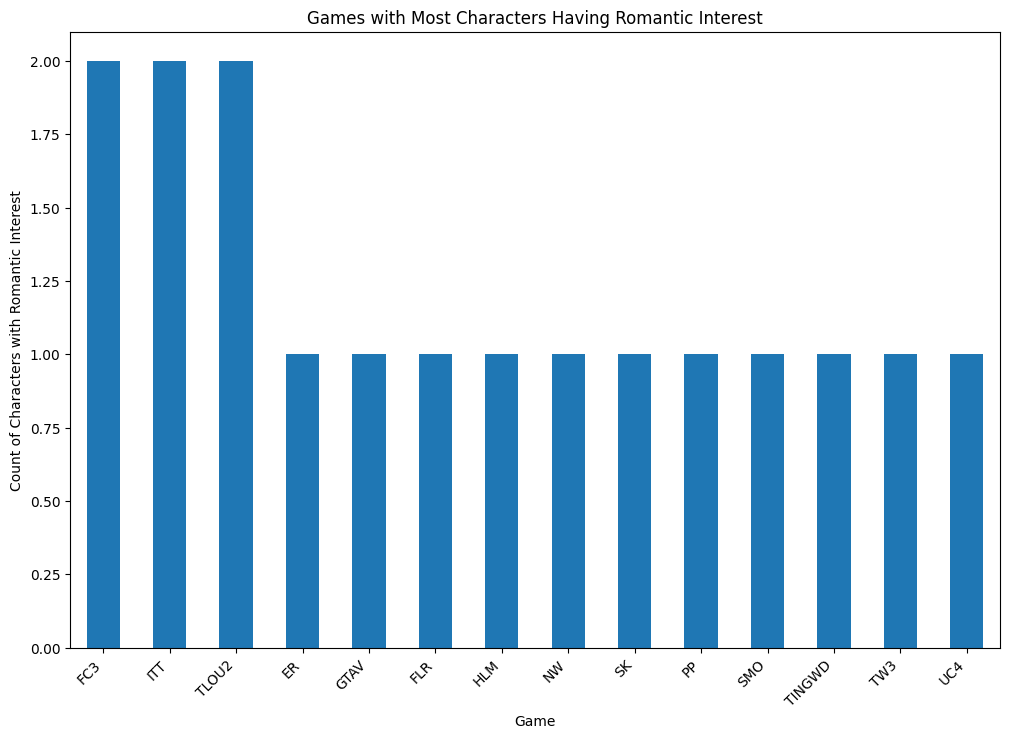

In [ ]:
# Visuals
plt.figure(figsize=(12, 8))
game_romantic_interest.plot(kind='bar')
plt.title('Games with Most Characters Having Romantic Interest')
plt.xlabel('Game')
plt.ylabel('Count of Characters with Romantic Interest')
plt.xticks(rotation=45, ha='right')
plt.show()


Far Cry 3, Ittle Dew and The last of us 2 are the games with more chars with interest on romance.

##### Does gender influence the likelihood of a character being considered a love interest?

In [ ]:
#grouping by gender + romantic interest
gender_romantic_interest = df_merged.groupby('Gender')['Romantic_Interest'].mean()

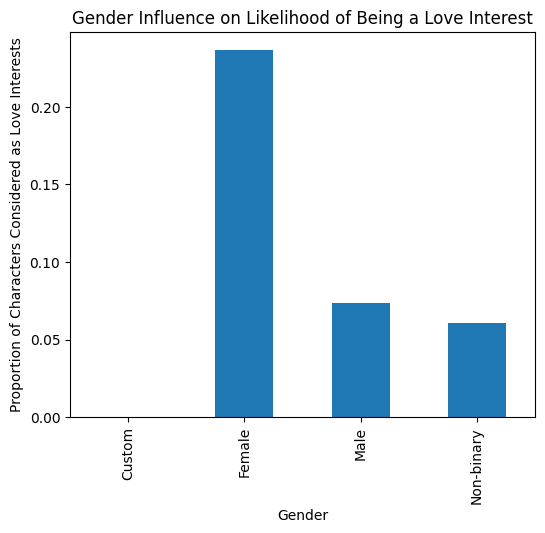

In [ ]:
#visuals
plt.figure(figsize=(6, 5))
gender_romantic_interest.plot(kind='bar')
plt.title('Gender Influence on Likelihood of Being a Love Interest')
plt.xlabel('Gender')
plt.ylabel('Proportion of Characters Considered as Love Interests')
plt.show()

Females have more interest in romance on games compared with the rest.